In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 문제 해결
rc('font', family='AppleGothic')

# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False

In [54]:
# 폰트 확인하는법 
import matplotlib.font_manager as fonm

font_list = [font.name for font in fonm.fontManager.ttflist]

for f in font_list:

    print(f"{f}.ttf")

DejaVu Serif.ttf
DejaVu Serif Display.ttf
STIXGeneral.ttf
DejaVu Sans.ttf
cmsy10.ttf
cmr10.ttf
STIXGeneral.ttf
STIXSizeTwoSym.ttf
STIXNonUnicode.ttf
DejaVu Serif.ttf
STIXNonUnicode.ttf
STIXSizeThreeSym.ttf
STIXSizeOneSym.ttf
STIXSizeFourSym.ttf
cmtt10.ttf
STIXSizeTwoSym.ttf
DejaVu Sans.ttf
STIXNonUnicode.ttf
STIXSizeFourSym.ttf
DejaVu Sans Mono.ttf
STIXNonUnicode.ttf
cmmi10.ttf
STIXSizeFiveSym.ttf
STIXSizeThreeSym.ttf
cmss10.ttf
DejaVu Sans Mono.ttf
DejaVu Sans Mono.ttf
DejaVu Serif.ttf
STIXGeneral.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
cmex10.ttf
STIXGeneral.ttf
cmb10.ttf
DejaVu Sans Mono.ttf
DejaVu Serif.ttf
DejaVu Sans Display.ttf
STIXSizeOneSym.ttf
Athelas.ttf
Noto Sans PhagsPa.ttf
Tahoma.ttf
Apple SD Gothic Neo.ttf
Noto Sans Old North Arabian.ttf
Noto Sans Buginese.ttf
.SF Compact.ttf
Noteworthy.ttf
Kohinoor Devanagari.ttf
Hiragino Sans.ttf
Noto Sans Marchen.ttf
Georgia.ttf
Apple Braille.ttf
Gurmukhi MN.ttf
Noto Sans Thaana.ttf
Noto Sans Lydian.ttf
Times New Roman.ttf
Hiragino Sans.t

#### dataset load

In [3]:
iris_dataset = sns.load_dataset('iris')
titanic_dataset = sns.load_dataset('titanic')
tips_dataset = sns.load_dataset('tips')
flights_dataset = sns.load_dataset('flights')

In [4]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
flights_dataset.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### barplot

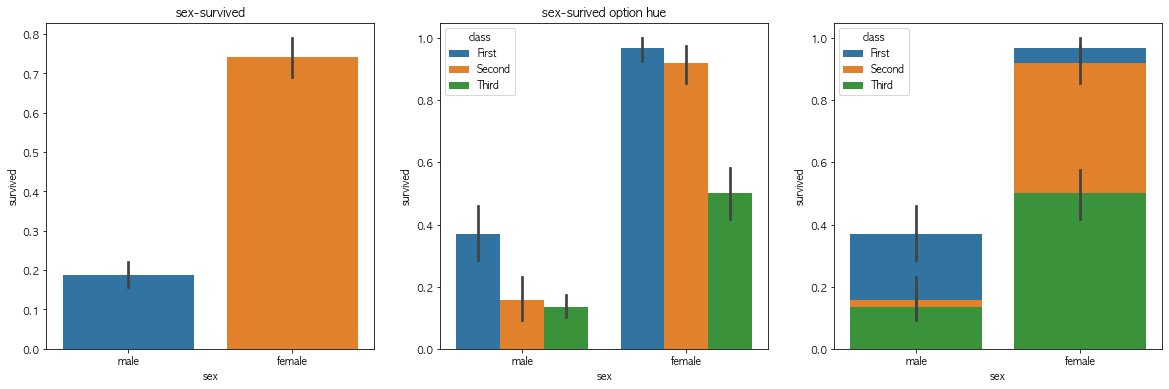

In [39]:
# 성별에 따른 생존률

fig = plt.figure(figsize=(20,6))

area01 = fig.add_subplot(1,3,1)
area01.set_title('sex-survived')
sns.barplot(ax=area01,
            data=titanic_dataset,
            x = 'sex', y = 'survived')

area02 = fig.add_subplot(1,3,2)
area02.set_title('sex-surived option hue')
sns.barplot(ax=area02,
            data=titanic_dataset,
            x = 'sex', y = 'survived',hue='class')

area03 = fig.add_subplot(1,3,3)
sns.barplot(ax=area03,
            data=titanic_dataset,
            x = 'sex', y = 'survived',hue='class',dodge=False)

plt.show()
plt.close()

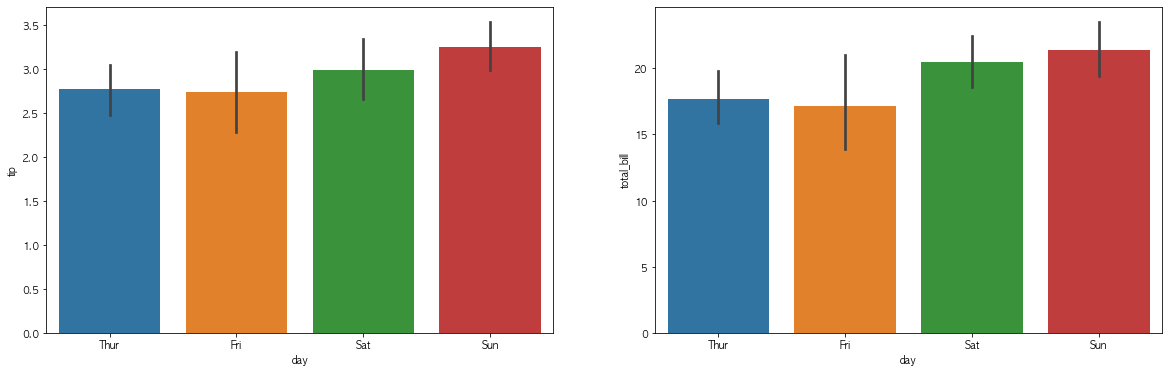

In [25]:
# 요일별 팁
fig = plt.figure(figsize=(20,6))
area01 = fig.add_subplot(1,2,1)
sns.barplot(ax=area01,
            data=tips_dataset,
            x = 'day', y = 'tip')

area02 = fig.add_subplot(1,2,2)
sns.barplot(ax=area02,
            data=tips_dataset,
            x = 'day', y = 'total_bill')

plt.show()

### countplot
- 빈도를 표시하기 때문에 당연히 x하나만 들어간다

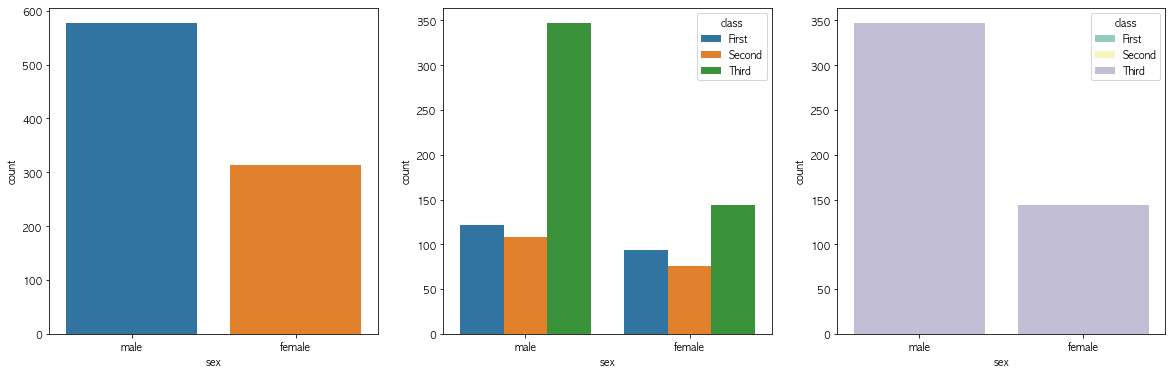

In [62]:
fig = plt.figure(figsize=(20,6))

area01 = fig.add_subplot(1,3,1)
sns.countplot(ax=area01,
            data=titanic_dataset,
            x = 'sex')


area02 = fig.add_subplot(1,3,2)
sns.countplot(ax=area02,
            data=titanic_dataset,
            x = 'sex',hue='class')

area03 = fig.add_subplot(1,3,3)
sns.countplot(ax=area03,
            data=titanic_dataset,
            x = 'sex',hue='class',palette='Set3',dodge=False
             )


plt.show()
plt.close()

<AxesSubplot:xlabel='class', ylabel='count'>

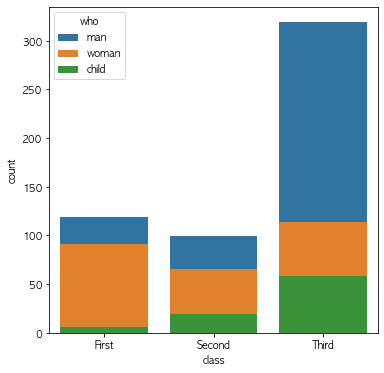

In [46]:
# 이건 왜 dodge가되는거지
fig = plt.figure(figsize=(20,6))

area01 = fig.add_subplot(1,3,1)
sns.countplot(ax=area01,
            data=titanic_dataset,
            x = 'class',hue='who',dodge=False)

### stritplot()
- 모든 데이터를 점으로 시각화

<AxesSubplot:xlabel='day', ylabel='total_bill'>

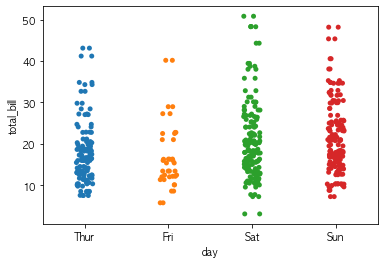

In [52]:
# 요일별 토탈 빌 분포
sns.stripplot(data=tips_dataset,x='day',y='total_bill')
sns.stripplot(data=tips_dataset,x='day',y='total_bill',jitter=True)

### swarmplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

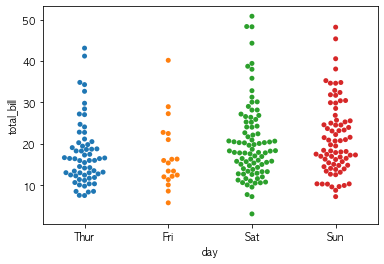

In [57]:
# 요일별 토탈 빌 분포
sns.swarmplot(data=tips_dataset,x='day',y='total_bill')

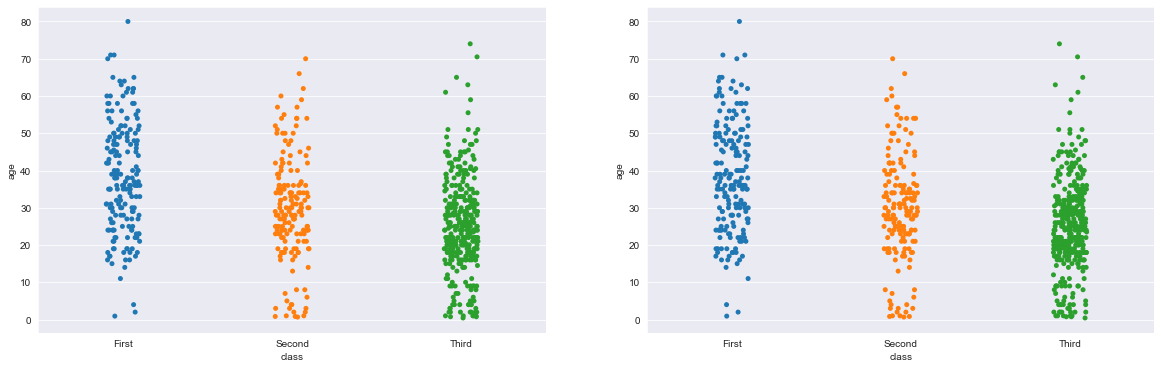

In [67]:
# 타이타닉 이용해서
# 서브플롯 2개 영역
# 클래스별 나이 분포
fig = plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

area01 = fig.add_subplot(1,2,1)
sns.stripplot(ax=area01,x='class',y='age',data=titanic_dataset,jitter=True)

area02 = fig.add_subplot(1,2,2)
sns.stripplot(ax=area02,x='class',y='age',data=titanic_dataset)

plt.show()
plt.close()

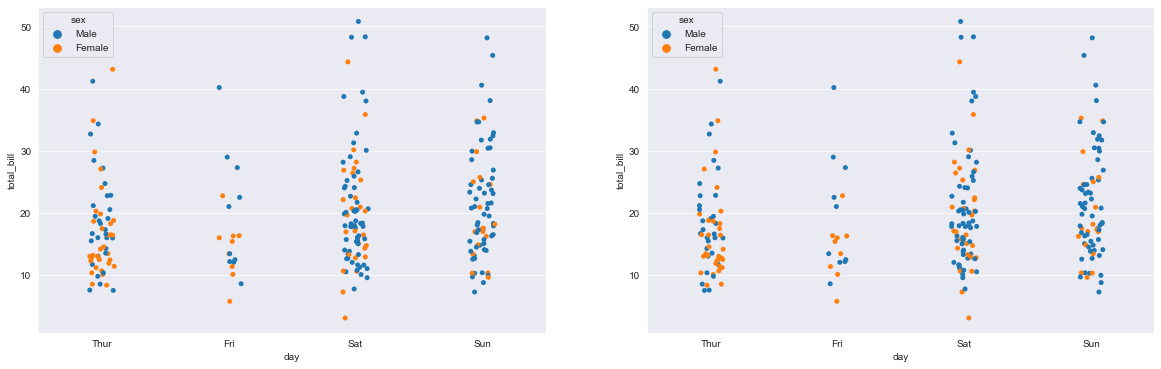

In [68]:
# 요일과 성별에 따른 전체팁의 분포를 확인하는 시각화
fig = plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

area01 = fig.add_subplot(1,2,1)
sns.stripplot(ax=area01,x='day',hue='sex',y='total_bill',data=tips_dataset,jitter=True)

area02 = fig.add_subplot(1,2,2)
sns.stripplot(ax=area02,x='day',hue='sex',y='total_bill',data=tips_dataset)

plt.show()
plt.close()

### boxplot
### violinplot

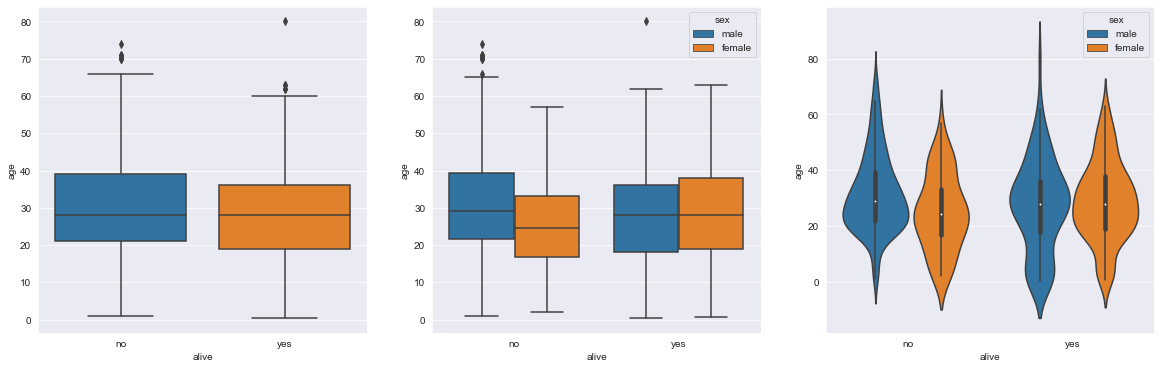

In [71]:
fig = plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

area01 = fig.add_subplot(1,3,1)
sns.boxplot(ax=area01,x='alive',y='age',data=titanic_dataset)


area02 = fig.add_subplot(1,3,2)
sns.boxplot(ax=area02,x='alive',hue='sex',y='age',data=titanic_dataset)

area03 = fig.add_subplot(1,3,3)
sns.violinplot(ax=area03,x='alive',hue='sex',y='age',data=titanic_dataset)

plt.show()
plt.close()

### heatmap

In [74]:
table = titanic_dataset.pivot_table(index='sex',columns='class',aggfunc='size')
display(table)

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='class', ylabel='sex'>

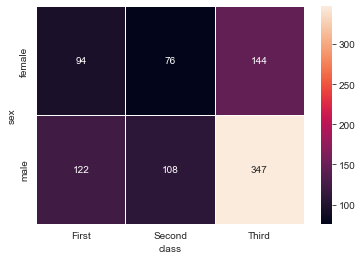

In [80]:
sns.heatmap(data=table,
            annot=True,fmt='d', # 'd'는 정수
            linewidths=1,
            cbar=True)  # default:True => False주면 컬러바 사라진다 

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

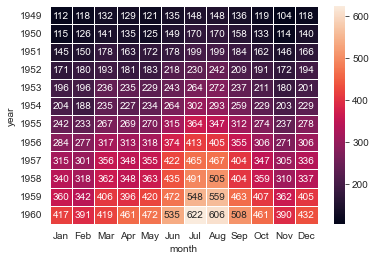

In [89]:
#### 년도에 월별 승객수에 대한 히트맵 시각화
table = flights_dataset.pivot_table(values='passengers',index='year',columns='month',aggfunc='sum')
display(table)
sns.heatmap(data=table,
            annot=True,fmt='d',
            linewidths=1)

### pairplot()

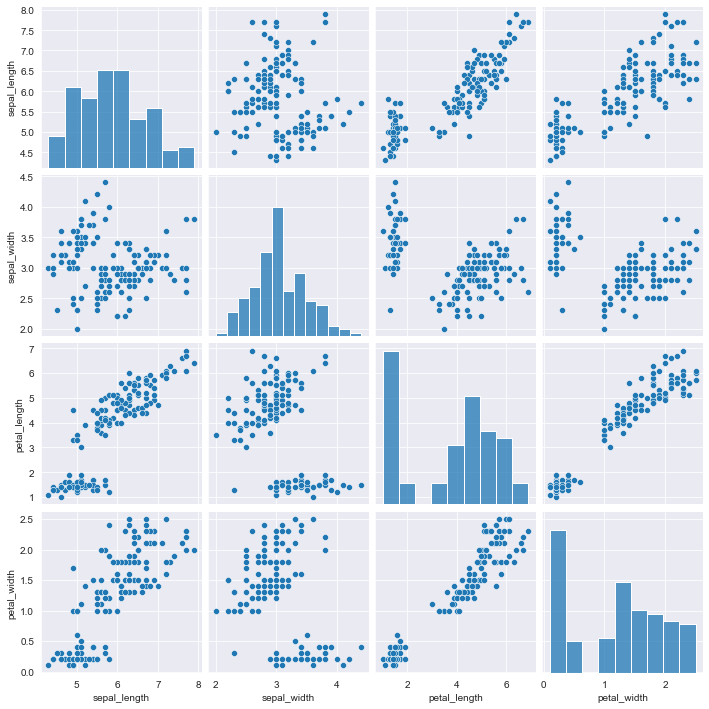

In [90]:
# 자동적으로 numeric 한 데이터에 대해서만 구해준다
sns.pairplot(iris_dataset)